<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/ML-LAB/blob/main/4_Variance_thresholding_%2C_PCA_and_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

In [43]:
df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/Qinspection.csv")

In [44]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A
...,...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4,C
140,6.9,6.7,3.3,5.7,2.5,2.6,C
141,6.9,6.7,3.0,5.2,2.3,2.4,C
142,6.5,6.3,2.5,5.0,1.9,2.0,C


In [45]:
from sklearn.feature_selection import VarianceThreshold

In [46]:
X=df.drop(columns="class")

In [47]:
X

,feature1,feature2,feature3,feature4,feature5,feature6
0,4.9,4.7,3.2,1.3,0.2,0.3
1,4.8,4.6,3.1,1.5,0.2,0.3
2,5.2,5.0,3.6,1.4,0.2,0.3
3,5.6,5.4,3.9,1.7,0.4,0.5
4,4.8,4.6,3.4,1.4,0.3,0.4
...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4
140,6.9,6.7,3.3,5.7,2.5,2.6
141,6.9,6.7,3.0,5.2,2.3,2.4
142,6.5,6.3,2.5,5.0,1.9,2.0


In [48]:
selector=VarianceThreshold(threshold=0.2)

In [49]:
X_selected=selector.fit_transform(X)

In [50]:
for i in range(len(selector.variances_)):
  print(f"{X.columns[i]} : {selector.variances_[i]}")

feature1 : 0.6976345486111111
feature2 : 0.6976345486111113
feature3 : 0.19400414737654317
feature4 : 3.1096484375
feature5 : 0.5760411844135802
feature6 : 0.5760411844135803


In [51]:
mask=selector.get_support()

In [54]:
selected_columns = X.columns[mask]

In [56]:
df_reduced = X[selected_columns].copy()

In [57]:
df_combined = pd.concat([df_reduced, df['class']], axis=1)
display(df_combined.head())

,feature1,feature2,feature4,feature5,feature6,class
0,4.9,4.7,1.3,0.2,0.3,A
1,4.8,4.6,1.5,0.2,0.3,A
2,5.2,5.0,1.4,0.2,0.3,A
3,5.6,5.4,1.7,0.4,0.5,A
4,4.8,4.6,1.4,0.3,0.4,A


# ---------------------------
# PCA on IRIS DATASET
# ----------------------------


In [58]:
import pandas as pd
import numpy as np

In [59]:
from sklearn.datasets import load_iris

In [60]:
iris = load_iris()

In [61]:
X = iris.data         # Feature matrix (150 samples x 4 features)
y = iris.target       # Target labels (0, 1, 2)


df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = y

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [64]:
import matplotlib.pyplot as plt

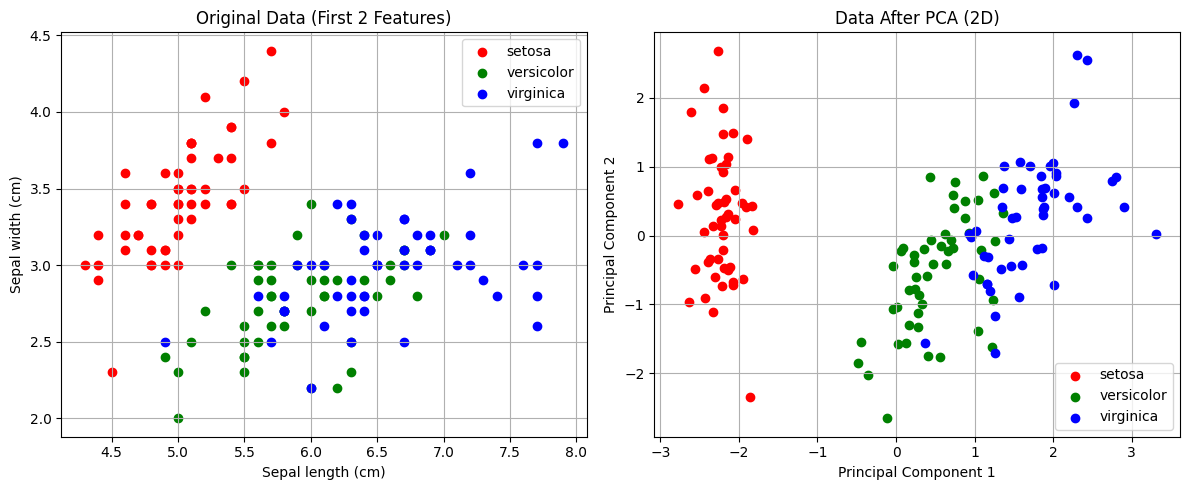

In [65]:
plt.figure(figsize=(12, 5))

# ---- Before PCA: Original features (first two) ----
plt.subplot(1, 2, 1)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Original Data (First 2 Features)')
plt.legend()
plt.grid(True)

# ---- After PCA: First 2 Principal Components ----
plt.subplot(1, 2, 2)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=color, label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA (2D)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



# ----------------------
# LDA
#  -------------------------

📌 What is LDA?
LDA is a supervised dimensionality reduction technique.

Unlike PCA (unsupervised), LDA uses class labels to find linear combinations that best separate the classes.

For the Iris dataset (3 classes), LDA can reduce the data to at most (number of classes − 1) = 2 dimensions.

In [66]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [69]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [70]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [71]:
# Step 1: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
# Step 2: Apply LDA (we choose 2 components since there are 3 classes)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

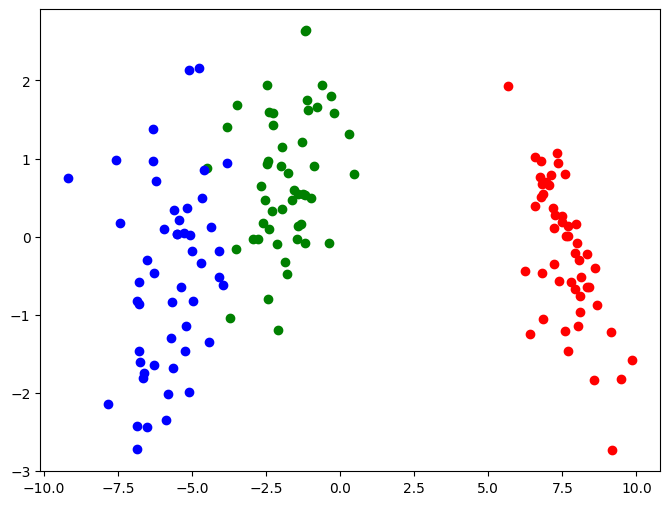

In [74]:
# Step 3: Plot the LDA results
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    plt.scatter(X_lda[y == target, 0], X_lda[y == target, 1], c=color, label=label)


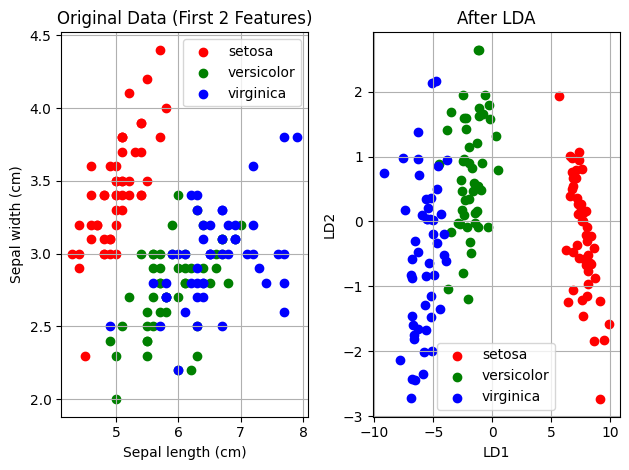

In [75]:
# --- Before LDA: Original data (first two features) ---
plt.subplot(1, 2, 1)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Original Data (First 2 Features)')
plt.legend()
plt.grid(True)

# --- After LDA: LD1 vs LD2 ---
plt.subplot(1, 2, 2)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    plt.scatter(X_lda[y == target, 0], X_lda[y == target, 1], c=color, label=label)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('After LDA')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()